# Clase 11: Analisis de Regresión I

El análisis de regresión permite establecer relaciones entre una o mas variables (continuas) de estudio.
Para abrirlo con colab: <a target="_blank" href="https://githubtocolab.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/Clases/Clase11_AnalisisDeRegresionI.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [4]:
# Requerimientos
!pip install seaborn -q # Para visualización y datasets
!pip install scipy -q # Para analísis estadísticos
!pip install numpy -q # Para cálculos científicos
!pip install pandas -q # Para almacenamiento y trabajo con datos
!pip install matplotlib -q # Para visualización
!pip install statsmodels -q # Para analísis estadísticos
!pip install rdatasets -q

# Correlación de Pearson

La correlación de Pearson toma valores entre -1 y 1, indicando una relación negativa o positiva entre las variables.

In [5]:
import numpy as np
import pandas as pd
from io import StringIO

data_str = """x,y
5.632953933071785,10.26652558473546
14.292682432860898,-5.736260651285763
13.356985188949468,12.696818760248988
5.330982406317768,22.70905375139738
16.77968013849555,3.0381781073361234
12.128175834919137,7.047497350140256
13.55668216288333,-0.9659806893021727
6.268039011473929,16.782477489051686
3.2130396484088157,15.494212215423078
10.018495539326135,10.609811661384098
-0.5352649943969645,19.52075182520905
14.786152901557479,9.08201531808917
3.9022850372328017,0.5966595900740392
-1.4327224259260642,18.1856619740959
12.657955592107378,10.713866111408612
6.247514499132093,-7.799871791336132
7.320105651327481,-7.388795886681166
22.290017244046716,-4.225911235513507
14.879956266029538,18.49612062115048
14.130685587485363,-10.676165869471603
9.4055315094151,6.437999250599389
5.158744428990462,-3.861099941217587
-3.677161479191332,4.744258096378043
7.850455156950677,1.7226460712222904
4.8112679459574785,4.240389843631043
9.247118985641738,-8.546636300835168
9.315672391398023,-4.608088185597406
10.956248567146318,7.249543392685798
9.069628858650546,3.768395368736006
2.449382110467531,5.0104102001239985
9.730096608705459,-0.712432479238883
5.316579543842664,9.226217750232308
14.902810904294896,-11.733858102258935
22.13697995698655,-6.360259305718504
15.259043494008344,8.612124894239937
1.4065493071060562,15.568642128201585
-25.75651527544006,-14.929204528045041
12.952360165815206,12.64385053589725
11.353813530247514,5.071653485388705
-4.5775225469821095,6.0197433586368785
10.538861597599919,2.6723284443726283
10.136847693850775,-9.203631279439042
7.250725057729307,-3.133227305700867
4.6568624264675575,9.610693038179434
7.954043450140906,2.8510639042814496
6.310336331571889,6.389452481135367
21.773132659408304,13.442303618887726
9.264317466103956,-8.084503332116125
12.681554384759938,15.451686581364205
8.145083254427185,17.101739229185007"""

no_asociacion = pd.read_csv(StringIO(data_str))


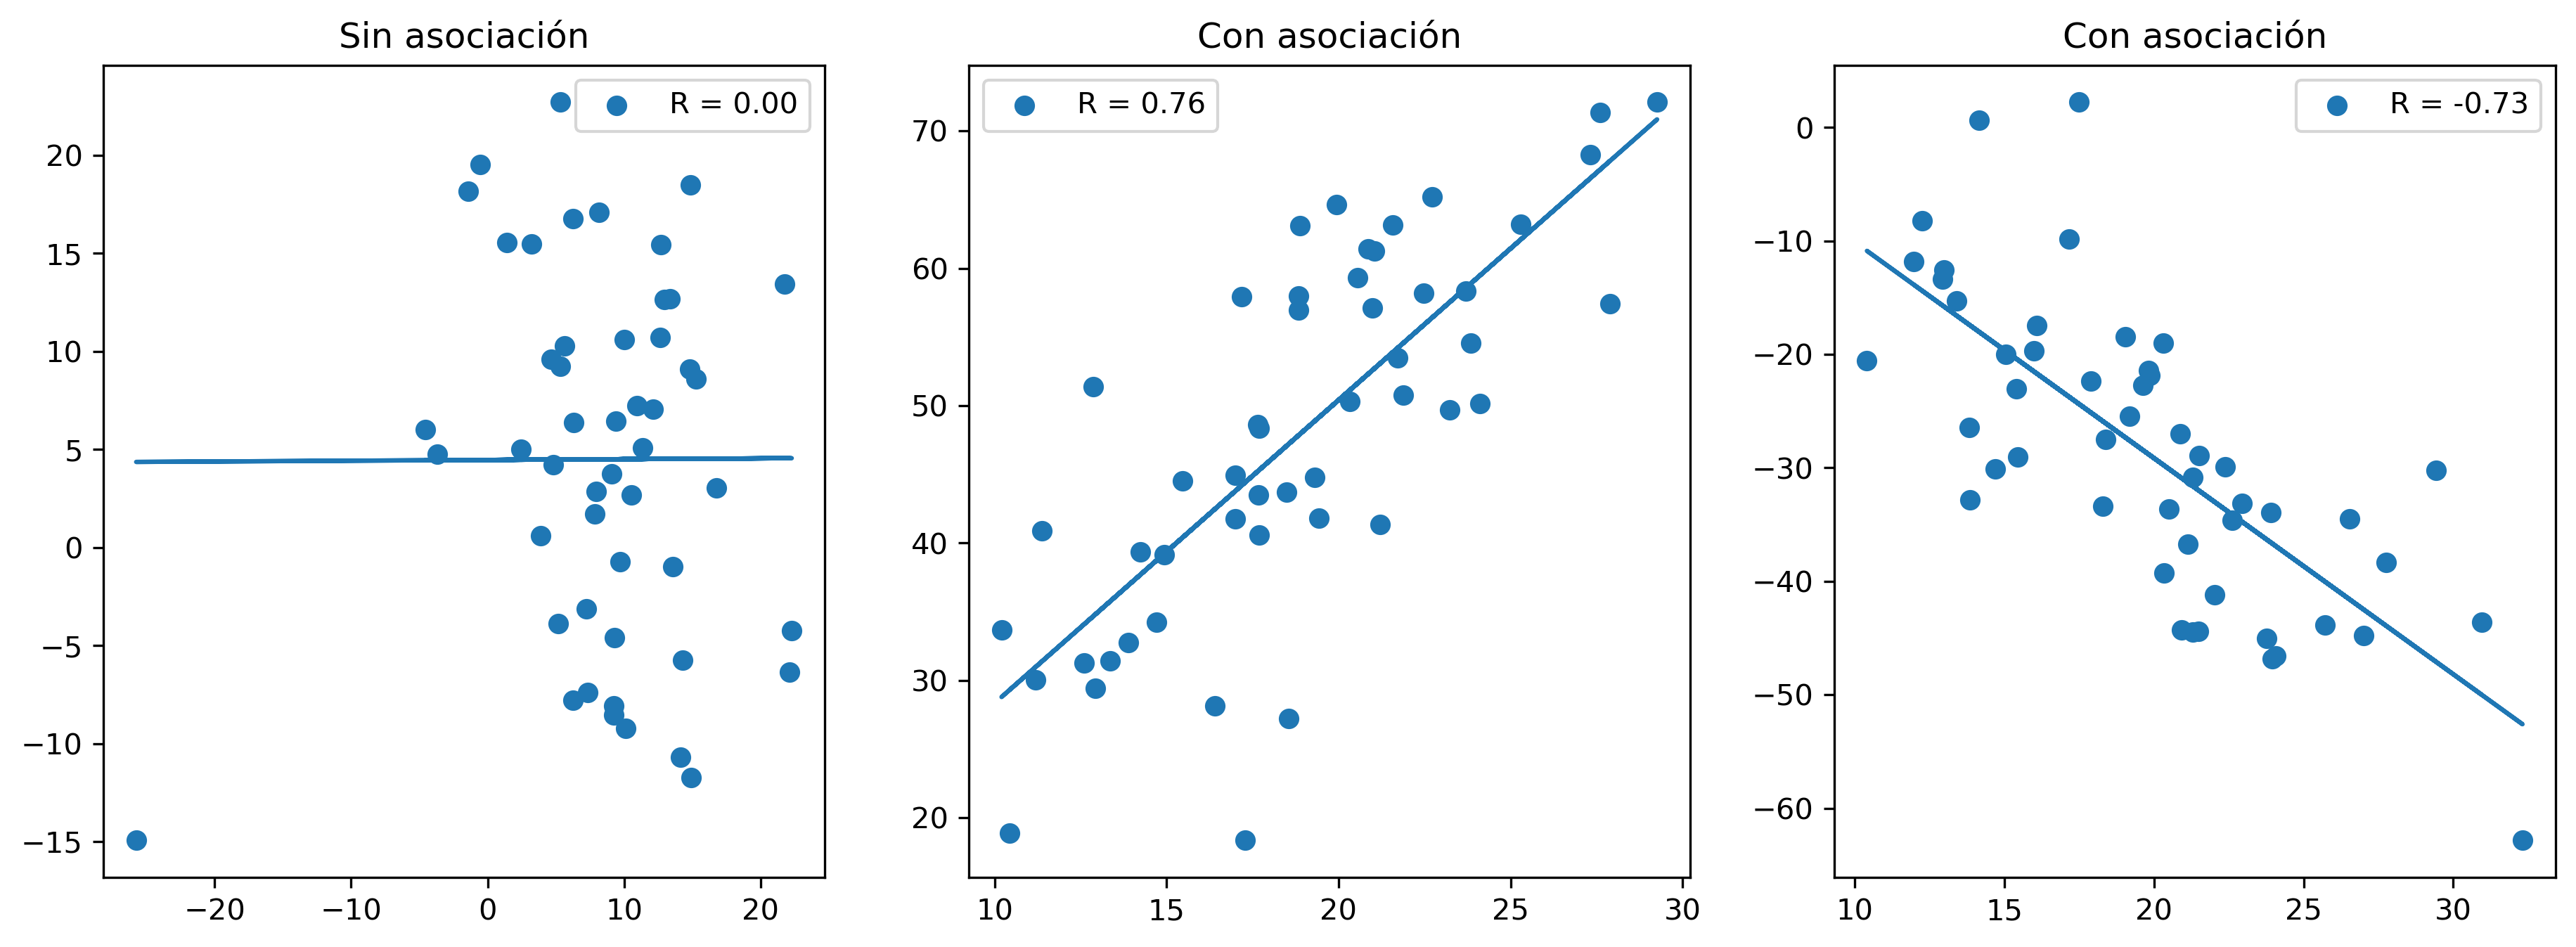

In [6]:
# datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
np.random.seed(42)
asociado_posi = st.norm.rvs(loc = 20, scale = 5, size = 50)
asociado_posi = pd.DataFrame.from_dict({'x': asociado_posi,
                                        'y': asociado_posi*2 + 10 + st.norm.rvs(scale = 10, size = 50)})
asociado_neg = st.norm.rvs(loc = 20, scale = 5, size = 50)
asociado_neg = pd.DataFrame.from_dict({'x': asociado_neg,
                                        'y': asociado_neg* - 2 + 10 + st.norm.rvs(scale = 10, size = 50)})


fig, ax = plt.subplots(1, 3, dpi = 300, figsize = (15,5))
slope, intercept, r_value, p_value, std_err = st.linregress(no_asociacion['x'], no_asociacion['y'])
ax[0].scatter(no_asociacion['x'], no_asociacion['y'], label = f'R = {r_value:.2f}')
ax[0].set_title('Sin asociación')
ax[0].plot(no_asociacion['x'], slope * no_asociacion['x'] + intercept)
ax[0].legend()
x_lims_out = ax[0].get_xlim()
y_lims_out = ax[0].get_ylim()

slope, intercept, r_value, p_value, std_err = st.linregress(asociado_posi['x'], asociado_posi['y'])
ax[1].scatter(asociado_posi['x'], asociado_posi['y'], label = f'R = {r_value:.2f}')
ax[1].set_title('Con asociación')
ax[1].plot(asociado_posi['x'], slope * asociado_posi['x'] + intercept)
ax[1].set_title('Con asociación')
ax[1].legend()

slope, intercept, r_value, p_value, std_err = st.linregress(asociado_neg['x'], asociado_neg['y'])
ax[2].scatter(asociado_neg['x'], asociado_neg['y'], label = f'R = {r_value:.2f}')
ax[2].set_title('Con asociación')
ax[2].plot(asociado_neg['x'], slope * asociado_neg['x'] + intercept)
ax[2].set_title('Con asociación')
ax[2].legend()



Mas, la correlación de Pearson es sensible a outliers

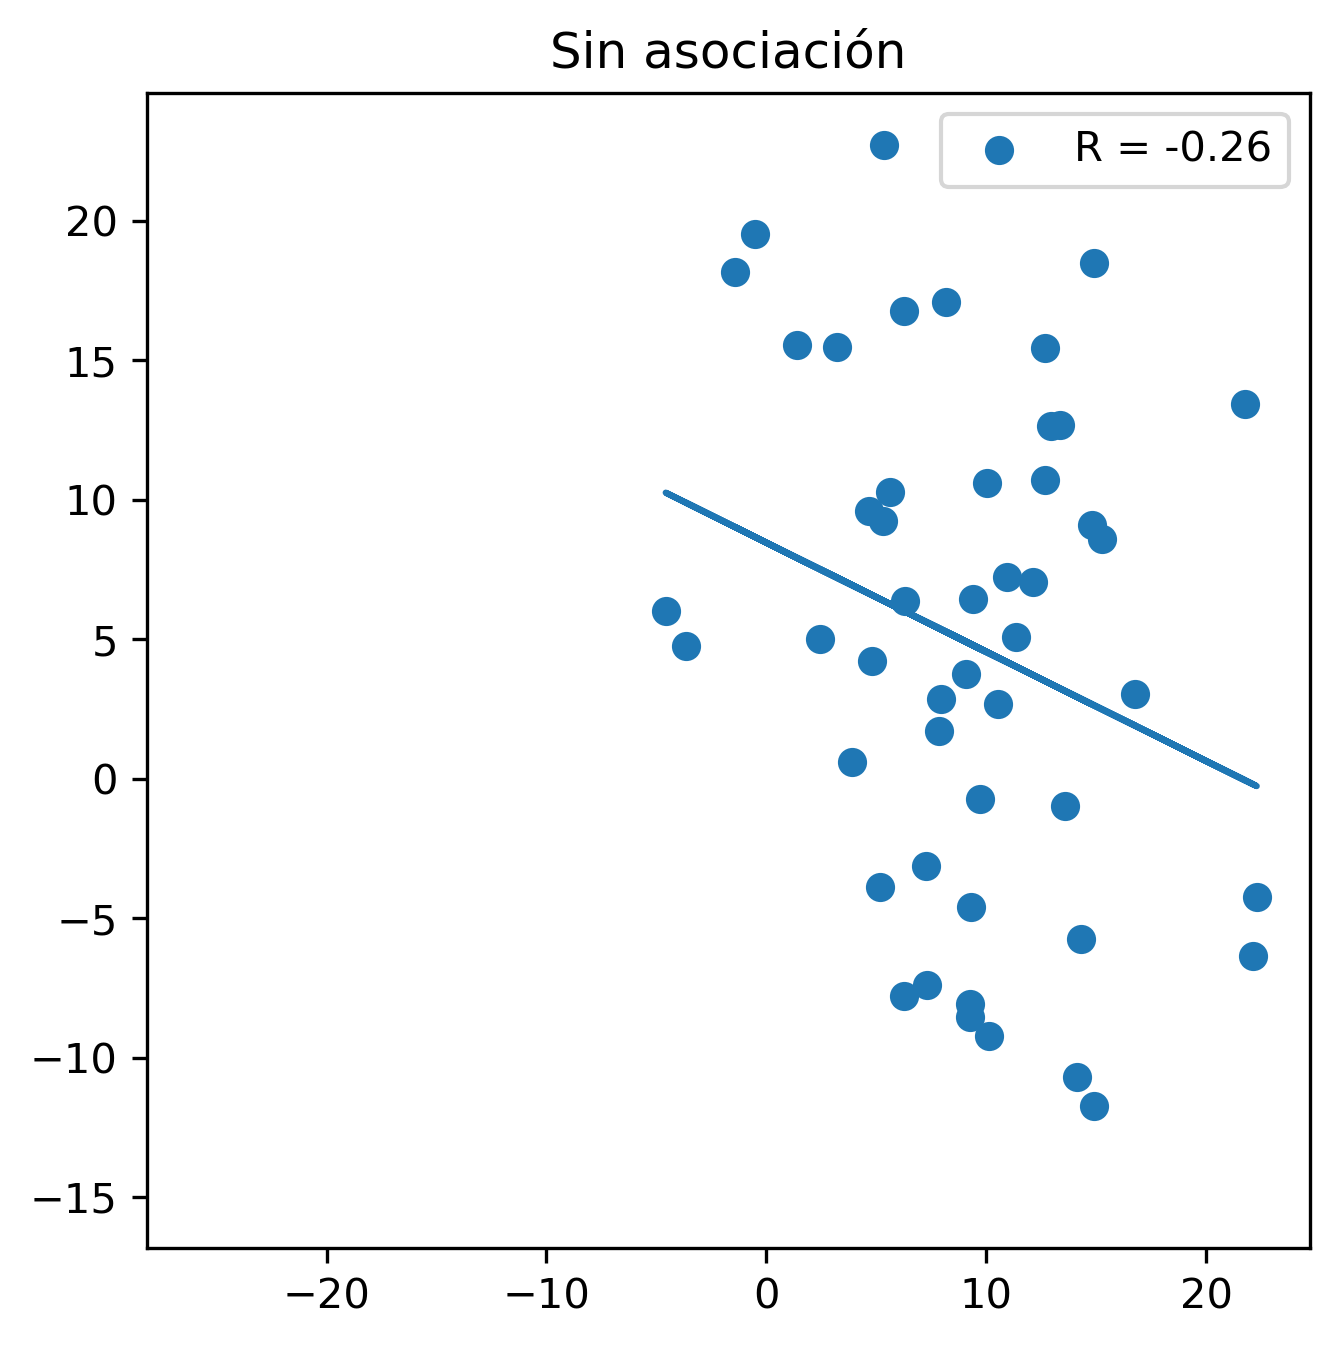

In [7]:
sin_out = no_asociacion[no_asociacion['x'] > -20]
fig, ax = plt.subplots(1, 1, dpi = 300, figsize = (5,5))
slope, intercept, r_value, p_value, std_err = st.linregress(sin_out['x'], sin_out['y'])
ax.scatter(sin_out['x'], sin_out['y'], label = f'R = {r_value:.2f}')
ax.set_title('Sin asociación')
ax.plot(sin_out['x'], slope * sin_out['x'] + intercept)
ax.set_xlim(x_lims_out)
ax.set_ylim(y_lims_out)
ax.legend()


Para poder calcular dicha cantidad es posible utilizas funciones de python para dicho problema, sin la necesidad de calcular una regresión lineal previa -como se hizo previamente.

In [8]:
# tomando el caso de una asociación positiva
import scipy.stats as st

covarianza = np.cov(asociado_posi['x'], asociado_posi['y'])
correlacion = covarianza[0,1] / np.sqrt(covarianza[0,0] * covarianza[1,1])
# Correlacion de person directa
pearson_r = st.pearsonr(asociado_posi['x'], asociado_posi['y'])[0]

print(f"Covarianza: {covarianza[0,1]:.4f}")
print(f"Desviación Estándar x: {covarianza[0,0]:.4f}")
print(f"Desviación Estándar y: {covarianza[1,1]:.4f}")
print(f"Correlación (calculada): {correlacion:.4f}")
print(f"Correlación de Pearson: {pearson_r:.4f}")


Covarianza: 48.0796
Desviación Estándar x: 21.7934
Desviación Estándar y: 181.5891
Correlación (calculada): 0.7643
Correlación de Pearson: 0.7643


Es posible hacer inferencia sobre la correlación:

- $H_0$: $R = 0$
- $H_a$: $R\neq0$

Así:

In [9]:
pearson_r, pearson_pval = st.pearsonr(asociado_posi['x'],
                                      asociado_posi['y'])
print(f"Correlación de Pearson: {pearson_r:.4f}")
print(f"p-value: {pearson_pval:.4e}")

Correlación de Pearson: 0.7643
p-value: 1.0590e-10


Es interesante también ver el caso donde no se puede rechazar la hipótesis nula.

In [10]:
pearson_r, pearson_pval = st.pearsonr(no_asociacion['x'],
                                      no_asociacion['y'])
print(f"Correlación de Pearson: {pearson_r:.4f}")
print(f"p-value: {pearson_pval:.4f}")

Correlación de Pearson: 0.0033
p-value: 0.9821


Y al sacar el outlier podemos ver el efecto de este sobre la correlación y la significancia de la prueba.

In [11]:
sin_out = no_asociacion[no_asociacion['x'] > -20]
pearson_cor, pearson_pval = st.pearsonr(sin_out['x'], sin_out['y'])
print(f"Correlación de Pearson: {pearson_cor:.4f}")
print(f"p-value: {pearson_pval:.4f}")

Correlación de Pearson: -0.2572
p-value: 0.0744


# Correlación de Spearman

La correlación de Spearman es una versión no paramétrica de la correlación de Pearson que analiza la relación del tipo monotónica de los datos.

---
Referencia:

https://support.minitab.com/es-mx/minitab/help-and-how-to/statistics/basic-statistics/supporting-topics/correlation-and-covariance/a-comparison-of-the-pearson-and-spearman-correlation-methods/

Al analizar los datos no asociados podemos ver que sigue la misma linea de análisis. Y se llega a conclusiones muy similares.

In [12]:
spearman_r, spearman_pval = st.spearmanr(no_asociacion['x'],
                                         no_asociacion['y'])
print(f"Correlación de Spearman: {spearman_r:.4f}")
print(f"p-value: {spearman_pval:.4f}")

Correlación de Spearman: -0.1455
p-value: 0.3132


Existen otros tipos de corrrelaciones, o métricas de asociación, que pueden ser utilizadas. Por ejemplo:

Kendall Tau: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html

Mutual Information Metric: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html y https://www.kaggle.com/code/ryanholbrook/mutual-information

# Caso de estudio: Pureza de oxígeno


Text(0.5, 0, 'Nivel de Hidrocarburo (%)')

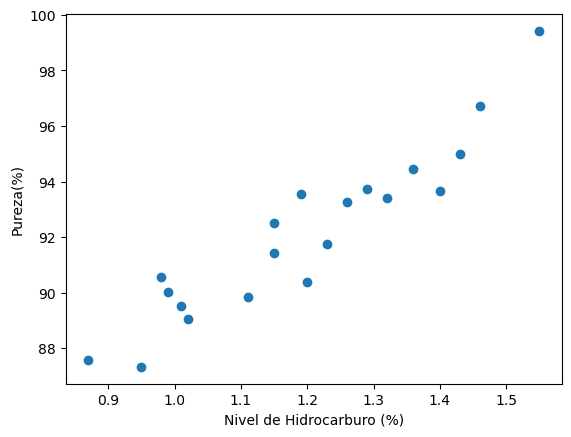

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = {
    "hc": [0.99, 1.02, 1.15, 1.29, 1.46, 1.36, 0.87, 1.23, 1.55, 1.40,
           1.19, 1.15, 0.98, 1.01, 1.11, 1.20, 1.26, 1.32, 1.43, 0.95],
    "pureza": [90.01, 89.05, 91.43, 93.74, 96.73, 94.45, 87.59, 91.77,
               99.42, 93.65, 93.54, 92.52, 90.56, 89.54, 89.85, 90.39,
               93.25, 93.41, 94.98, 87.33]
}

df = pd.DataFrame(data)

### Análisis exploratorio

fig, ax = plt.subplots()
ax.scatter(data['hc'], data['pureza'])
ax.set_ylabel('Pureza(%)')
ax.set_xlabel('Nivel de Hidrocarburo (%)')

In [14]:
# Calculamos la correlacion entre pureza (y) y el nivel de hidrocarburo (x)
import scipy.stats as st

covarianza = np.cov(df['hc'], df['pureza'])

correlacion = covarianza[0,1] / np.sqrt(covarianza[0,0] * covarianza[1,1])

pearson_r = st.pearsonr(df['hc'], df['pureza'])

print('Descriptores:')
print(f'Covarianza: {covarianza[0,1]:.4f}')
print(f'Desviación Estándar Hc: {covarianza[0,0]:.4f}')
print(f'Desviación Estándar Pureza: {covarianza[1,1]:.4f}')
print(f'Correlación (calculada): {correlacion:.4f}')
print(f'Correlacion de Pearson a mano: {correlacion:.4f}')
print(f'Correlación de Pearson: {pearson_r[0]:.4f}')


Descriptores:
Covarianza: 0.5357
Desviación Estándar Hc: 0.0358
Desviación Estándar Pureza: 9.1251
Correlación (calculada): 0.9367
Correlacion de Pearson a mano: 0.9367
Correlación de Pearson: 0.9367


Por medio del test de correlación

- $H_0$: $R = 0$
- $H_a$: $R\neq0$

Para esto utilizamos la siguiente función para la correlación de Pearson.

In [15]:
import scipy.stats as st
pearson_cor, pearson_pval = st.pearsonr(df['hc'], df['pureza'])
print(f'Correlación de Pearson: {pearson_cor:.4f}')
print(f'p-value: {pearson_pval:.4e}')

Correlación de Pearson: 0.9367
p-value: 1.2273e-09


De esta forma, podemos ver que existen una correlación de $0.9367$ y su significancia es mucho menor a 5%. De esta forma podemos ver que la correlación es significativa. Por lo cual, podemos aseverar que existe una relación positiva entre estas dos variables

A su vez, para poder calcular la correlación de Spearman, podemos usar la siguiente función.

In [16]:
spearman_cor, spearman_pval = st.spearmanr(df['hc'], df['pureza'])
print(f'Correlación de Spearman: {spearman_cor:.4f}')
print(f'p-value: {spearman_pval:.4e}')

Correlación de Spearman: 0.9237
p-value: 6.3276e-09


En donde podemos llegar a conclusiones similares.